# 

# Compare flat and PostISRCCD

- author : Sylvie Dagoret-Campagne
- affiliation CNRS
- creation date : 2023/09/20
- update : 2023/09/21

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [2]:
import os
from astropy.io import fits
from astropy.time import Time
import re

In [3]:
transform = AsinhStretch() + PercentileInterval(99.)

# Inputs

## Input flat

In [4]:
!ls ../special_flats_median_smoothing/special_flats/20230116/2023011600015

flat_2023011600015_empty_1.fits
special_flat_2023011600015_empty_1_ws_40.fits
special_flat_2023011600015_empty_1_ws_40-good.fits
special_flat_2023011600015_empty_1_ws_40.png
ws_analysis


In [5]:
path = "../special_flats_median_smoothing/special_flats/20230116/2023011600015"
filename = "special_flat_2023011600015_empty_1_ws_40.fits"

In [6]:
def getflattag(filename):
    #m=re.findall('exposure.*_(.*)_pseudo-postisrccd[.]fits$',filename)
    m=re.findall('special_flat_(.*)[.]fits$',filename)
    
    return m[0]

In [7]:
flat_tag = getflattag(filename)

In [8]:
fullfilename = os.path.join(path,filename)

In [9]:
hdu = fits.open(fullfilename)

In [10]:
hdu.info()

Filename: ../special_flats_median_smoothing/special_flats/20230116/2023011600015/special_flat_2023011600015_empty_1_ws_40.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     248   ()      
  1                1 ImageHDU         7   (4072, 4000)   float32   


In [11]:
data1 = hdu[1].data

## Input postisrccd

In [12]:
ls ../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914

exposure_2023091400094_dmpostisrccd.fits
exposure_2023091400095_dmpostisrccd.fits
exposure_2023091400108_dmpostisrccd.fits
exposure_2023091400109_dmpostisrccd.fits
exposure_2023091400120_dmpostisrccd.fits
exposure_2023091400121_dmpostisrccd.fits
exposure_2023091400132_dmpostisrccd.fits
exposure_2023091400133_dmpostisrccd.fits
exposure_2023091400145_dmpostisrccd.fits
exposure_2023091400146_dmpostisrccd.fits
exposure_2023091400157_dmpostisrccd.fits
exposure_2023091400158_dmpostisrccd.fits
exposure_2023091400169_dmpostisrccd.fits
exposure_2023091400170_dmpostisrccd.fits
exposure_2023091400182_dmpostisrccd.fits
exposure_2023091400183_dmpostisrccd.fits
exposure_2023091400194_dmpostisrccd.fits
exposure_2023091400195_dmpostisrccd.fits
exposure_2023091400215_dmpostisrccd.fits
exposure_2023091400216_dmpostisrccd.fits
exposure_2023091400227_dmpostisrccd.fits
exposure_2023091400228_dmpostisrccd.fits
exposure_2023091400239_dmpostisrccd.fits
exposure_2023091400240_dmpostisrccd.fits
exposure_2023091

In [13]:
path = "../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914"

In [14]:
list_of_files = sorted(os.listdir(path))
N=len(list_of_files)
N

26

In [15]:
[ print(idx,list_of_files[idx]) for idx in range(N)]

0 exposure_2023091400094_dmpostisrccd.fits
1 exposure_2023091400095_dmpostisrccd.fits
2 exposure_2023091400108_dmpostisrccd.fits
3 exposure_2023091400109_dmpostisrccd.fits
4 exposure_2023091400120_dmpostisrccd.fits
5 exposure_2023091400121_dmpostisrccd.fits
6 exposure_2023091400132_dmpostisrccd.fits
7 exposure_2023091400133_dmpostisrccd.fits
8 exposure_2023091400145_dmpostisrccd.fits
9 exposure_2023091400146_dmpostisrccd.fits
10 exposure_2023091400157_dmpostisrccd.fits
11 exposure_2023091400158_dmpostisrccd.fits
12 exposure_2023091400169_dmpostisrccd.fits
13 exposure_2023091400170_dmpostisrccd.fits
14 exposure_2023091400182_dmpostisrccd.fits
15 exposure_2023091400183_dmpostisrccd.fits
16 exposure_2023091400194_dmpostisrccd.fits
17 exposure_2023091400195_dmpostisrccd.fits
18 exposure_2023091400215_dmpostisrccd.fits
19 exposure_2023091400216_dmpostisrccd.fits
20 exposure_2023091400227_dmpostisrccd.fits
21 exposure_2023091400228_dmpostisrccd.fits
22 exposure_2023091400239_dmpostisrccd.fit

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:
idx = 6
filename = list_of_files[idx]
filename

'exposure_2023091400132_dmpostisrccd.fits'

In [17]:
def getexposuretag(filename):
    #m=re.findall('exposure.*_(.*)_pseudo-postisrccd[.]fits$',filename)
    m=re.findall('exposure.*_(.*)_dmpostisrccd[.]fits$',filename)
    
    return m[0]

In [18]:
exposure_selected = getexposuretag(filename)
filename_out_v1 = f"exposure_{exposure_selected}_flatten_v1.fits"
filename_out_v2 = f"exposure_{exposure_selected}_flatten_v2.fits"
filename_out_v3 = f"exposure_{exposure_selected}_flatten_v3.fits"
filename_out_v4 = f"exposure_{exposure_selected}_flatten_v4.fits"

In [19]:
exposure_selected

'2023091400132'

In [20]:
fullfilename = os.path.join(path,filename)
fullfilename

'../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914/exposure_2023091400132_dmpostisrccd.fits'

In [21]:
hdu = fits.open(fullfilename)

In [22]:
hdu.info()

Filename: ../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914/exposure_2023091400132_dmpostisrccd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  REB_COND      1 PrimaryHDU     208   ()      
  1                1 ImageHDU         7   (4072, 4000)   float32   


In [23]:
hdr2 = hdu[0].header
data2 = hdu[1].data

In [24]:
hdr2

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CCD_MANU= 'ITL     '                                                            
CCD_TYPE= '3800C   '                                                            
DETSIZE = '[1:4072,1:4000]'                                                     
BINX    =                    1                                                  
BINY    =                    1                                                  
CCDGAIN =                  1.0                                                  
CCDNOISE=                 10.0                                                  
CCDSLOT = 'S00     '                                                            
RAFTBAY = 'R00     '        

In [25]:
the_object =hdr2['OBJECT']
the_filter = hdr2['FILTER']

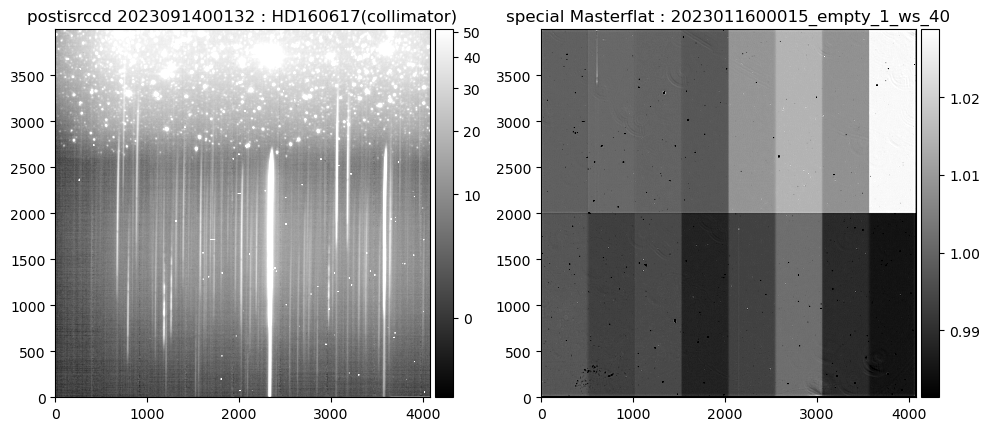

In [26]:
# Create an ImageNormalize object
fig ,axs =plt.subplots(1,2,figsize=(10,5))

ax1=axs[0]

norm = ImageNormalize(data2, interval=PercentileInterval(90.),stretch=AsinhStretch())
im1 = ax1.imshow(data2,origin="lower",norm=norm,cmap="gray")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
title = f"postisrccd {exposure_selected} : {the_object}({the_filter})"
ax1.set_title(title)

ax2=axs[1]
norm = ImageNormalize(data1, interval=PercentileInterval(95.))
im2=ax2.imshow(data1,origin="lower",norm=norm,cmap="gray")
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical');
title = f"special Masterflat : {flat_tag}"
ax2.set_title(title)

plt.tight_layout()

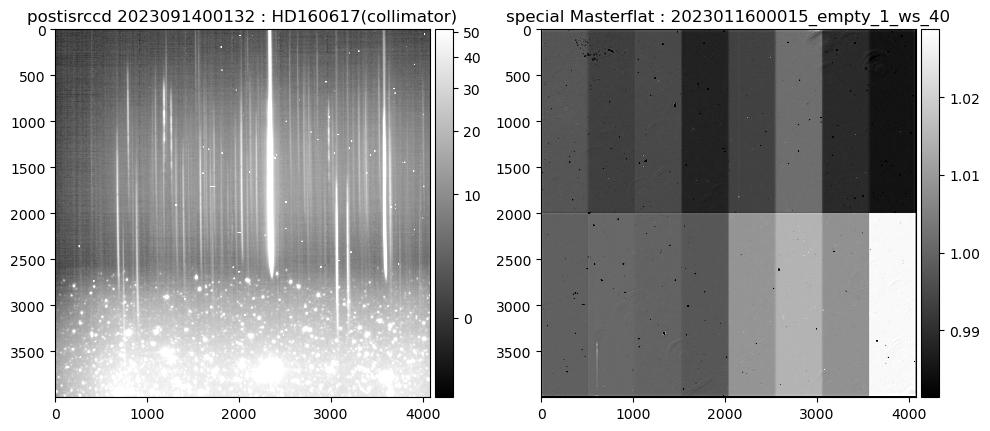

In [27]:
# Create an ImageNormalize object
fig ,axs =plt.subplots(1,2,figsize=(10,5))

ax1=axs[0]

norm = ImageNormalize(data2, interval=PercentileInterval(90.),stretch=AsinhStretch())
im1 = ax1.imshow(data2,norm=norm,cmap="gray")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
title = f"postisrccd {exposure_selected} : {the_object}({the_filter})"
ax1.set_title(title)


ax2=axs[1]
norm = ImageNormalize(data1, interval=PercentileInterval(95.))
im2=ax2.imshow(data1,norm=norm,cmap="gray")
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical');
title = f"special Masterflat : {flat_tag}"
ax2.set_title(title)

plt.tight_layout()

In [28]:
image_flat_v1 = data2/data1
image_flat_v2 = data2/np.flipud(data1)
image_flat_v3 = data2/np.fliplr(data1)
image_flat_v4 = data2/np.fliplr(np.flipud(data1))

In [29]:
primary_hdu = fits.PrimaryHDU(header=hdr2)
image_hdu = fits.ImageHDU(image_flat_v1)
hdu_list = fits.HDUList([primary_hdu, image_hdu])
hdu_list.writeto(filename_out_v1,overwrite=True)

In [30]:
primary_hdu = fits.PrimaryHDU(header=hdr2)
image_hdu = fits.ImageHDU(image_flat_v2)
hdu_list = fits.HDUList([primary_hdu, image_hdu])
hdu_list.writeto(filename_out_v2,overwrite=True)

In [31]:
primary_hdu = fits.PrimaryHDU(header=hdr2)
image_hdu = fits.ImageHDU(image_flat_v3)
hdu_list = fits.HDUList([primary_hdu, image_hdu])
hdu_list.writeto(filename_out_v3,overwrite=True)

In [32]:
primary_hdu = fits.PrimaryHDU(header=hdr2)
image_hdu = fits.ImageHDU(image_flat_v4)
hdu_list = fits.HDUList([primary_hdu, image_hdu])
hdu_list.writeto(filename_out_v4,overwrite=True)